What is mental health?
Mental health includes our emotional, psychological, and social well-being. It affects how we think, feel, and act. It also helps determine how we handle stress, relate to others, and make healthy choices.1 Mental health is important at every stage of life, from childhood and adolescence through adulthood.


Why is mental health important for overall health?
    Mental and physical health are equally important components of overall health.  For example, depression increases the risk for many types of physical health problems, particularly long-lasting conditions like diabetes, heart disease, and stroke. Similarly, the presence of chronic conditions can increase the risk for mental illness.



In this notebook, I intend to perform analysis among different datasets. First, we will have a comprehensive analysis of the data using the Plotly library. Then, with the regression algorithm, we consider one of the variables as a target and model it. 



# 1- Import Libraries

In [108]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# 2- Call Datasets

In [109]:
Data1 = pd.read_csv("mental-illnesses-prevalence.csv")
Data2 = pd.read_csv("adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv")
Data3 = pd.read_csv("depressive-symptoms-across-us-population.csv")
Data4 = pd.read_csv("number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv")

In [110]:
df1 = pd.DataFrame(Data1)
df2 = pd.DataFrame(Data2)
df3 = pd.DataFrame(Data3)
df4 = pd.DataFrame(Data4)

# 3- Functional Describe of All Datasets

In [111]:
def describe(df):
    
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing
    })    
        
    return output

# 4- Output of Describes

In [112]:
print(describe(df1))

print(describe(df2))

print(describe(df3))

print(describe(df4))

                                            variable    dtype  count  unique   
0                                             Entity   object   6420     214  \
1                                               Code   object   6420     206   
2                                               Year    int64   6420      30   
3  Schizophrenia disorders (share of population) ...  float64   6420    6406   
4  Depressive disorders (share of population) - S...  float64   6420    6416   
5  Anxiety disorders (share of population) - Sex:...  float64   6420    6417   
6  Bipolar disorders (share of population) - Sex:...  float64   6420    6385   
7  Eating disorders (share of population) - Sex: ...  float64   6420    6417   

   missing value  
0              0  
1            270  
2              0  
3              0  
4              0  
5              0  
6              0  
7              0  
            variable    dtype  count  unique  missing value
0             Entity   object     22      22    

# 5- Some Visualizations with Plotly

In [113]:
df2.sort_values(by= "Major depression" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2, x="Major depression", y="Entity", orientation='h',color='Bipolar disorder')
fig.show()

<Figure size 1280x960 with 0 Axes>

In [114]:
df2.sort_values(by= "Eating disorders" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2, x="Eating disorders", y="Entity", orientation='h',color='Dysthymia')
fig.show()

<Figure size 1280x960 with 0 Axes>

In [115]:
df2.replace(to_replace="<0.1", value=0.1, regex=True, inplace=True)

In [116]:
df2['Schizophrenia'] = df2['Schizophrenia'].astype(float)

In [117]:
df2.sort_values(by= "Schizophrenia" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2, x="Schizophrenia", y="Entity", orientation='h',color='Anxiety disorders')
fig.show()

<Figure size 1280x960 with 0 Axes>

# 6- Amazing Dynamik Subplot with Plotly and go

In [118]:
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

x1 = ["Andean Latin America", "West Sub-Saharan Africa", "Tropical Latin America", "Central Asia", "Central Europe",
    "Central Sub-Saharan Africa", "Southern Latin America", "North Africa/Middle East", "Southern Sub-Saharan Africa",
    "Southeast Asia", "Oceania", "Central Latin America", "Eastern Europe", "South Asia", "East Sub-Saharan Africa",
    "Western Europe", "World", "East Asia", "Caribbean", "Asia Pacific", "Australasia", "North America"]

fig.append_trace(go.Bar(
    x=df2["Bipolar disorder"],
    y=x1,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(20, 10, 56, 1.0)',
            width=0),
    ),
    name='Bipolar disorder in Mental Health',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=df2["Major depression"], y=x1,
    mode='lines+markers',
    line_color='rgb(40, 0, 128)',
    name='Major depression in Mental Health',
), 1, 2)

fig.update_layout(
    title='Major depression and Bipolar disorder',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=5,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.45],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=10000,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []


# Adding labels
for ydn, yd, xd in zip(df2["Major depression"], df2["Bipolar disorder"], x1):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn+10,
                            text='{:,}'.format(ydn) + '%',
                            font=dict(family='Arial', size=10,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd+10 ,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=10,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper',
                        x=-0.2, y=-0.109,
                        text="Mental health visualization",
                        font=dict(family='Arial', size=20, color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

# 7- Multiple Analysis

In [119]:
x = ["Appetite change", "Average across symptoms", "Depressed mood", "Difficulty concentrating", "Loss of interest",
    "Low energy", "Low self-esteem", "Psychomotor agitation", "Psychomotor agitation", "Sleep problems", "Suicidal ideation"]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=x, y=df3["Nearly every day"], name='Nearly every day',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=x, y=df3["More than half the days"], name = 'More than half the days',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=x, y=df3["Several days"], name='Several days',
                         line=dict(color='black', width=4,
                              dash='dashdot') # dash options include 'dash', 'dot', and 'dashdot'
))

# Edit the layout
fig.update_layout(title='Depressive symptoms across us population',
                   xaxis_title='Entity',
                   yaxis_title='Types of days')


fig.show()

In [120]:
x = ["Alcohol use disorders", "Amphetamine use disorders", "Anorexia nervosa", "Anxiety disorders",
     "Attention-deficit hyperactivity disorder", "Autism spectrum disorders", "Bipolar disorder",
     "Bulimia nervosa", "Cannabis use disorders", "Cocaine use disorders", "Dysthymia","Major depressive disorder",
    "Opioid use disorders", "Other drug use disorders", "Personality disorders"]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=x, y=df4["Number of countries with primary data on prevalence of mental disorders"],
                         name='Nearly every day',
                         line=dict(color='firebrick', width=4)))


# Edit the layout
fig.update_layout(title='mental illnesses in the global burden of disease study',
                   xaxis_title='illnesses',
                   yaxis_title='Number of countries')


fig.show()

# 8- Rename Columns

In [121]:
df1_column_names = list(df1.columns.values)
df1_column_names

['Entity',
 'Code',
 'Year',
 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']

In [122]:
df1 = df1.rename(columns={'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders', 
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'Anxiety disorders',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'Bipolar disorders',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'Eating disorders'})

In [123]:
df1

,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [124]:
df1_variables = df1[["Schizophrenia disorders","Depressive disorders","Anxiety disorders","Bipolar disorders",
                       "Eating disorders"]]

In [125]:
df1_variables

,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,0.223206,4.996118,4.713314,0.703023,0.127700
1,0.222454,4.989290,4.702100,0.702069,0.123256
2,0.221751,4.981346,4.683743,0.700792,0.118844
3,0.220987,4.976958,4.673549,0.700087,0.115089
4,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...
6415,0.201042,3.407624,3.184012,0.538596,0.095652
6416,0.201319,3.410755,3.187148,0.538593,0.096662
6417,0.201639,3.411965,3.188418,0.538589,0.097330
6418,0.201976,3.406929,3.172111,0.538585,0.097909


# 9- Correlation

In [126]:
Corrmat = df1_variables.corr()

<Axes: >

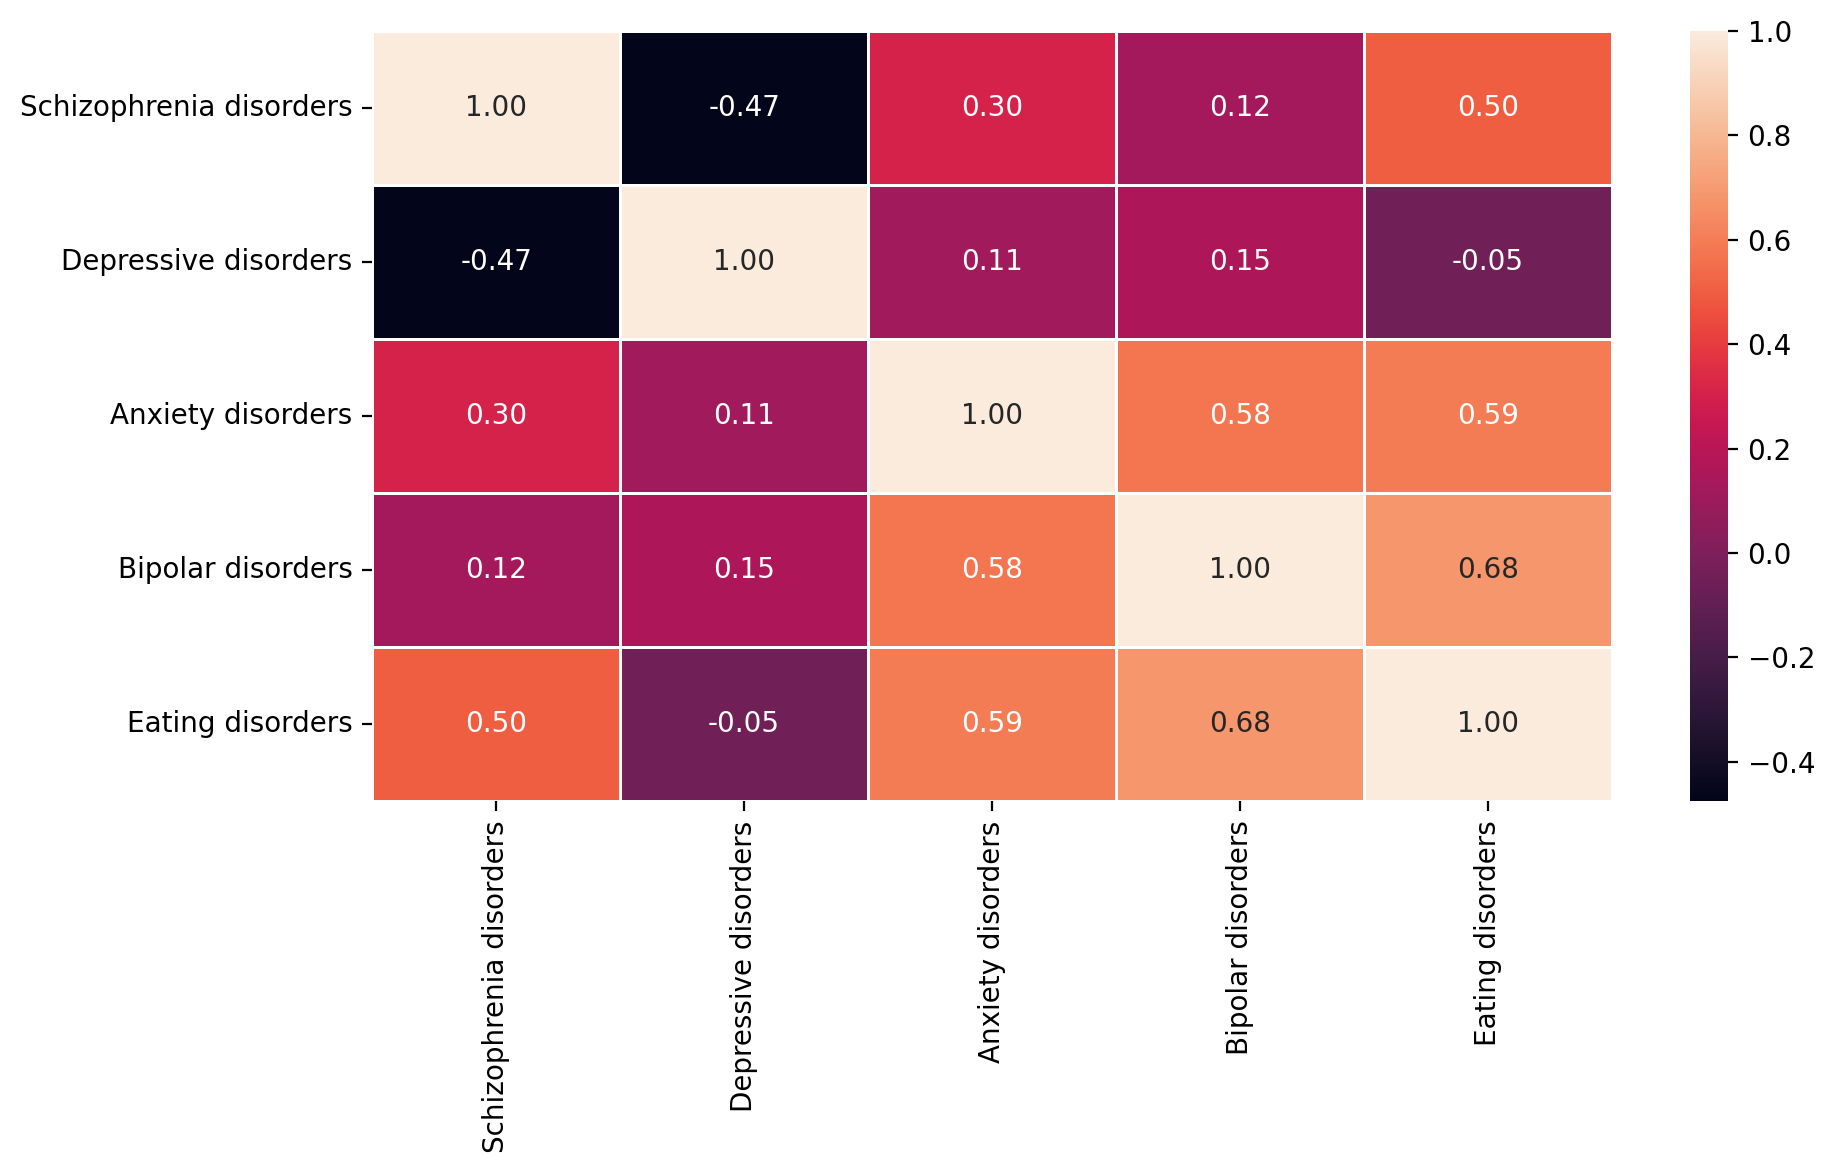

In [127]:
plt.figure(figsize=(10, 5), dpi=200)
sns.heatmap(Corrmat, annot=True,fmt=".2f", linewidth=.5)

# 10- Scatter and Box plot

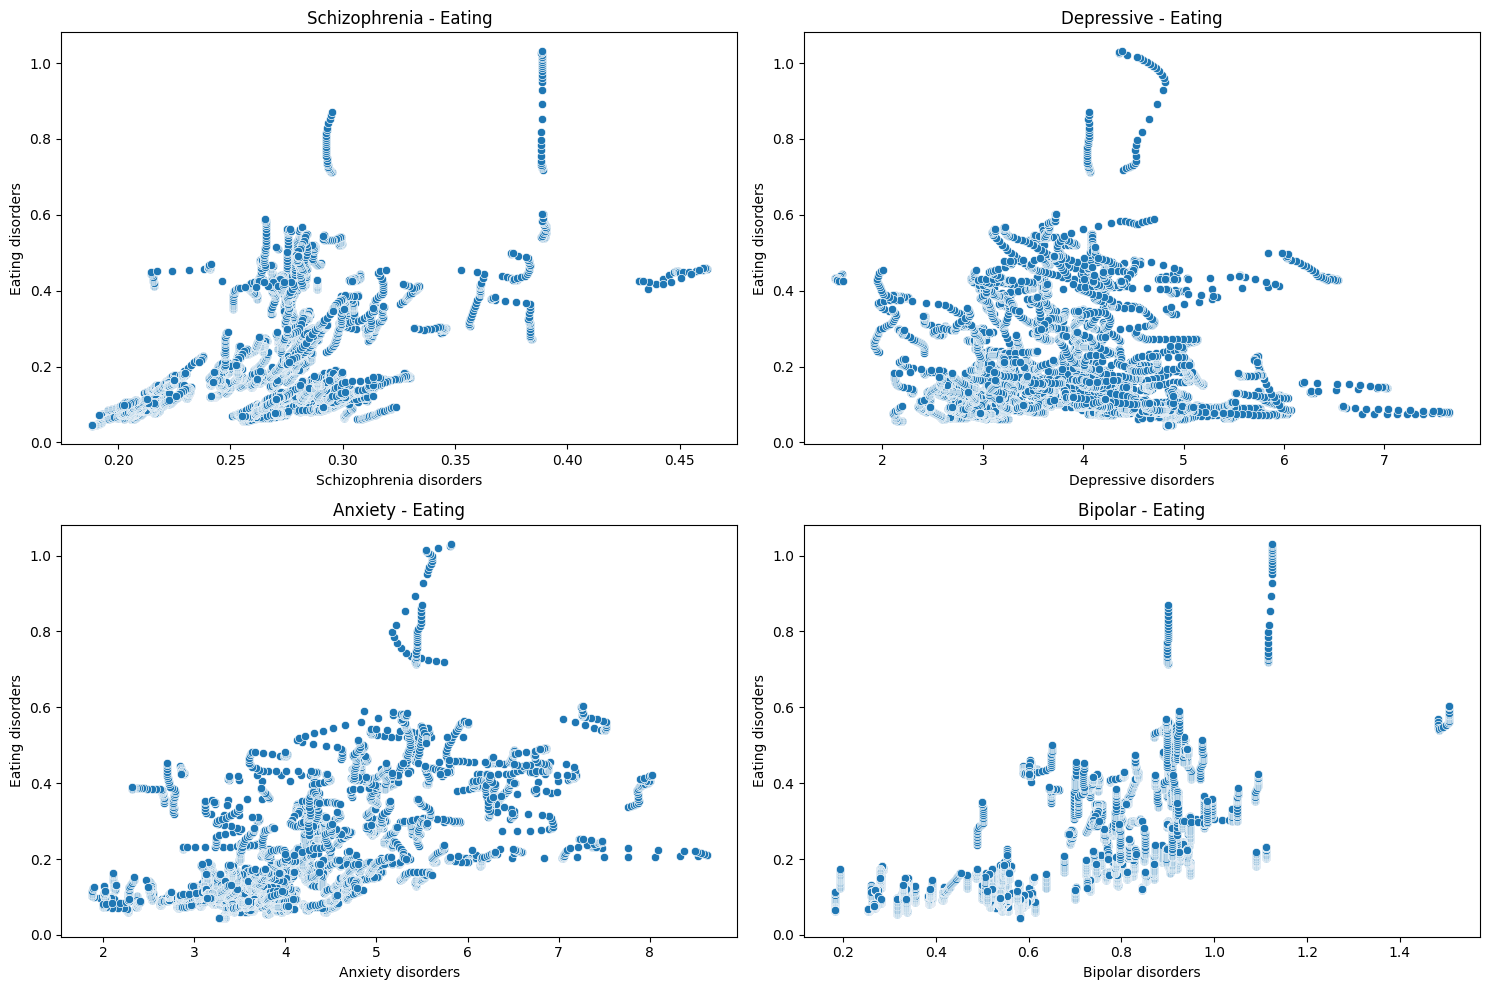

In [128]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize= (15,10))

ax1.set_title('Schizophrenia - Eating')
sns.scatterplot(x="Schizophrenia disorders", y="Eating disorders", data=df1_variables, ax=ax1)

ax2.set_title('Depressive - Eating')
sns.scatterplot(x='Depressive disorders', y="Eating disorders", data=df1_variables, ax=ax2)

ax3.set_title('Anxiety - Eating')
sns.scatterplot(x='Anxiety disorders', y="Eating disorders", data=df1_variables, ax=ax3)

ax4.set_title('Bipolar - Eating')
sns.scatterplot(x='Bipolar disorders', y="Eating disorders", data=df1_variables, ax=ax4)

plt.tight_layout()

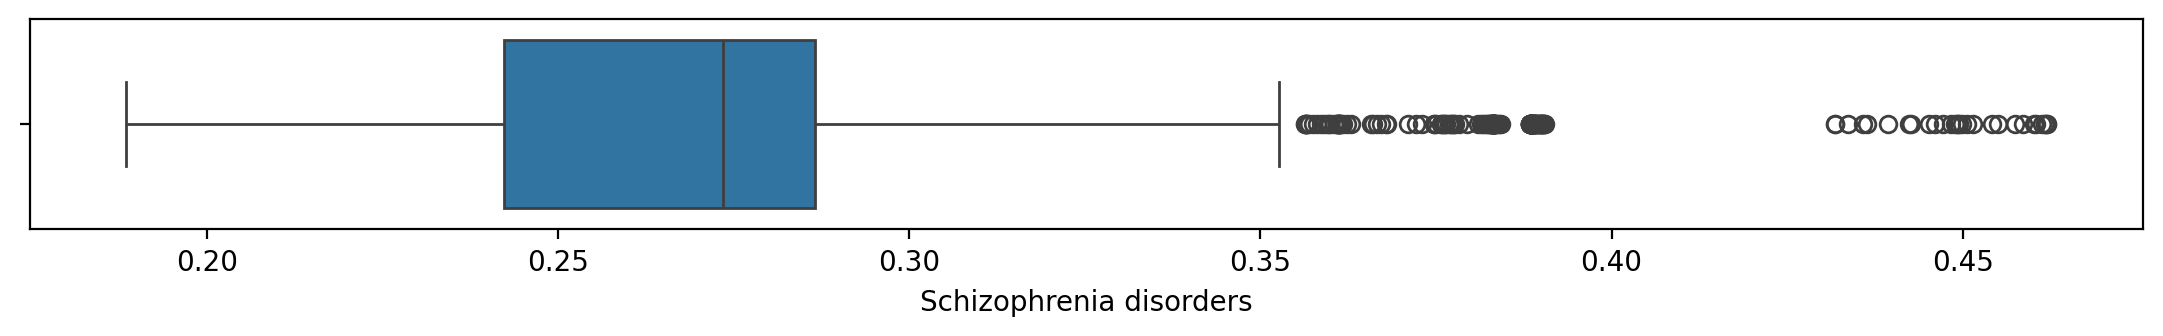

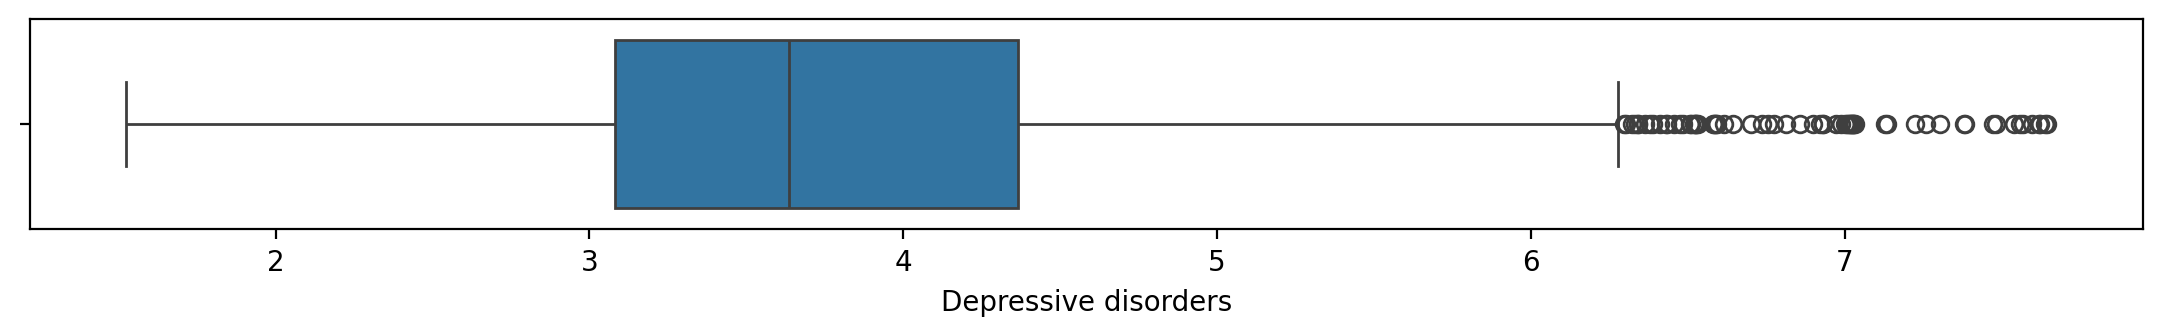

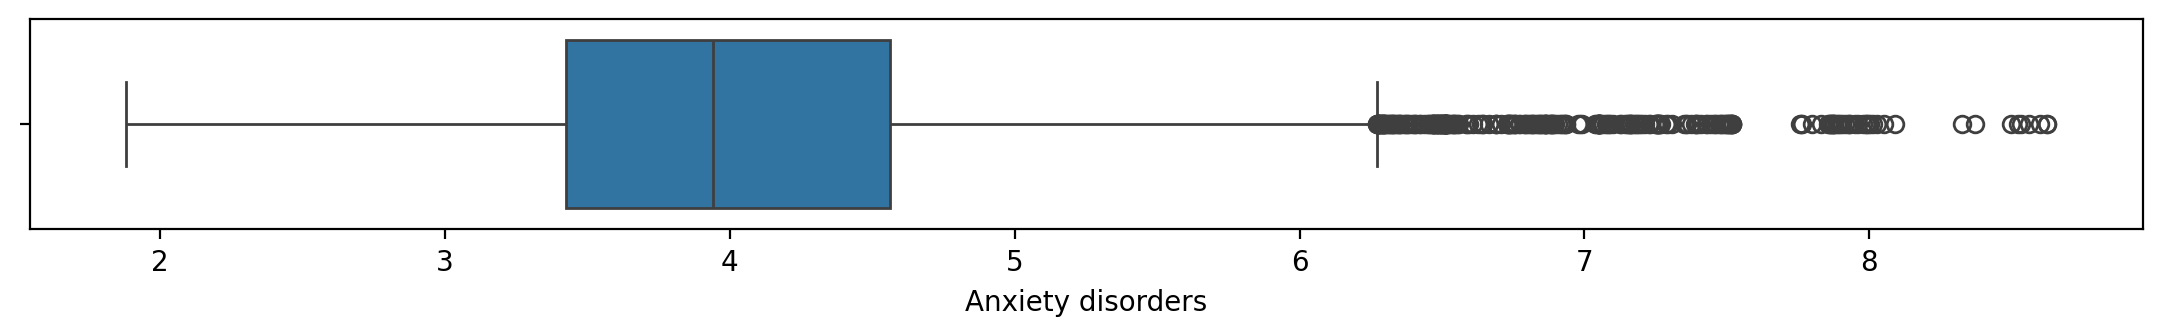

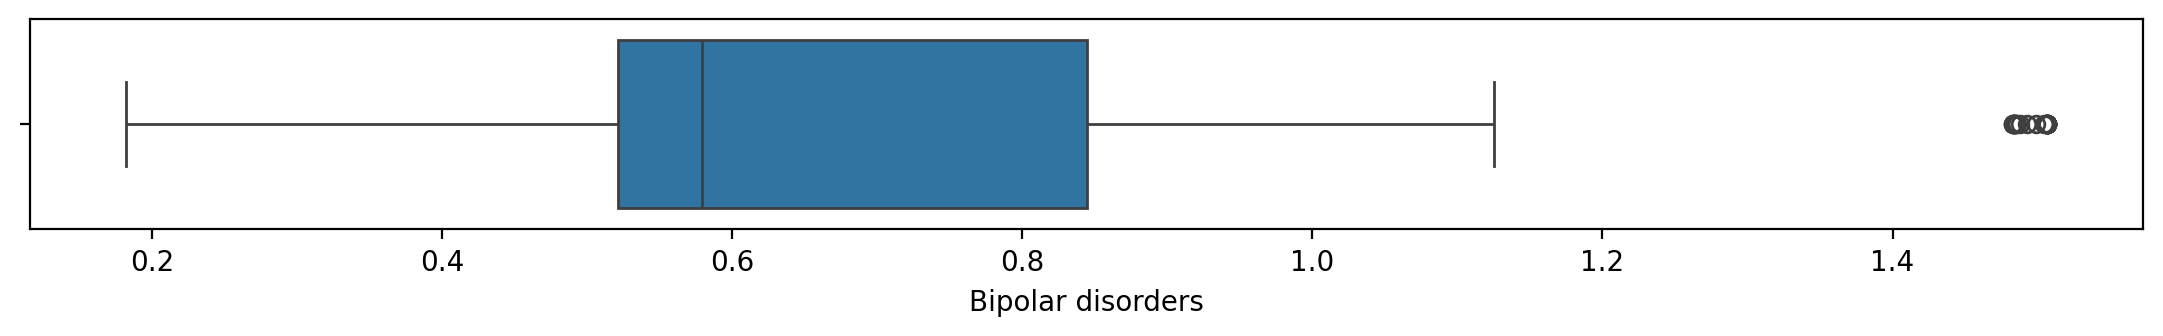

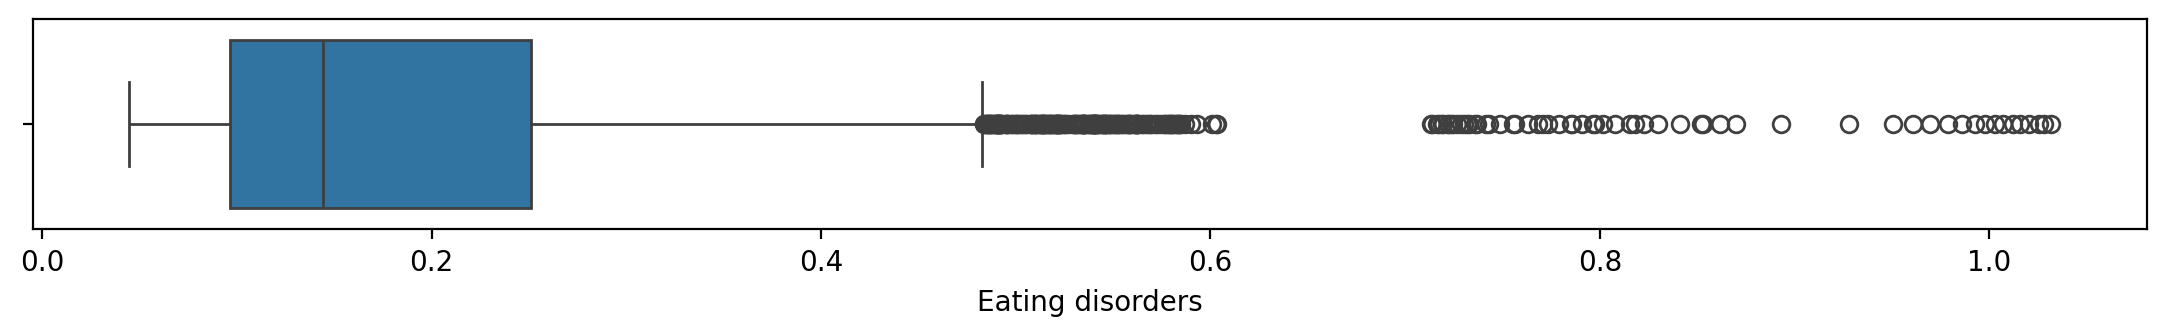

In [129]:
Numerical = ['Schizophrenia disorders', 'Depressive disorders','Anxiety disorders','Bipolar disorders','Eating disorders']
i = 0
while i < 5:
    fig = plt.figure(figsize = [30,3], dpi=200)
    plt.subplot(2,2,1)
    sns.boxplot(x = Numerical[i], data = df1_variables)
    i += 1
    plt.show()

Creat model

# 11- Normalize

To build the predictive model, we selected "Eating disorders" as the target variable, as the goal was to understand and forecast its prevalence based on related mental health conditions. The features chosen for the model were Schizophrenia disorders, Depressive disorders, Anxiety disorders, and Bipolar disorders. These variables were selected based on clinical evidence suggesting a high degree of comorbidity between these disorders and eating disorders. By modeling this relationship, we aim to identify potential predictors and better understand the factors that may contribute to the rise or decline of eating disorder rates.

In [130]:
features = ['Schizophrenia disorders', 'Depressive disorders','Anxiety disorders','Bipolar disorders']
X_model = df1[features]
y_model = df1["Eating disorders"]

In [131]:
scaler = preprocessing.MinMaxScaler()
X_model_norm = scaler.fit_transform(X_model)

In [132]:
X_model_norm

array([[0.12714204, 0.56728135, 0.42008448, 0.39345779],
       [0.12439376, 0.56616628, 0.41842183, 0.39273757],
       [0.1218262 , 0.56486898, 0.41570011, 0.39177399],
       ...,
       [0.04832425, 0.30858363, 0.19399437, 0.26936249],
       [0.0495569 , 0.30776117, 0.19157658, 0.26935944],
       [0.05140367, 0.30589079, 0.1863733 , 0.26935592]])

# 12- Simple Linear Regression

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_model_norm, y_model, test_size=0.2, random_state=42)

In [134]:
print("Shape of x_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (5136, 4)
Shape of y_train :  (5136,)
Shape of x_test :  (1284, 4)
Shape of y_test :  (1284,)


In [135]:
Model = LinearRegression()
Model.fit(X_train, y_train)

LinearRegression()

In [136]:
y_pred = Model.predict(X_test)

In [137]:
print("Mean Absolute Error of Model is: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error of Model is: ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared of Model is: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score of Model is: ", metrics.r2_score(y_test,y_pred))

Mean Absolute Error of Model is:  0.05295538495364768
Mean Squared Error of Model is:  0.0064400572663291765
Root Mean Squared of Model is:  0.08024996739145242
R2 Score of Model is:  0.6776573651975215


In [138]:
k_fold = KFold(10)
print (cross_val_score(Model, X_model_norm, y_model.ravel(), cv=k_fold, n_jobs=1))

[0.67019159 0.30224538 0.34774549 0.6311535  0.62898747 0.59061848
 0.66269011 0.57389516 0.64517085 0.84017723]


# 13- Support Vector Machine

In [139]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)


In [140]:
from sklearn import metrics
import numpy as np

def evaluate(model_name, y_test, y_pred):
    print(f"\n📊 {model_name} Performance:")
    print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
    print("MSE:", metrics.mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("R²:", metrics.r2_score(y_test, y_pred))

evaluate("SVR", y_test, y_pred_svr)




📊 SVR Performance:
MAE: 0.05143853209643768
MSE: 0.003921926416259067
RMSE: 0.06262528575790346
R²: 0.8036967619638911


# 14- Custom model using RF and its enhancement

In [141]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Build the model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # hidden layer 1
model.add(Dense(8, activation='relu'))  # hidden layer 2
model.add(Dense(1, activation='linear'))  # output layer for regression

# 2. Compile the model
model.compile(loss='mse', optimizer='adam')

# 3. Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# 4. Predict
y_pred_nn = model.predict(X_test).flatten()

# 5. Evaluate
print("\n📊 Custom Neural Network Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_nn))
print("MSE:", mean_squared_error(y_test, y_pred_nn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("R²:", r2_score(y_test, y_pred_nn))


41/41 [==============================] - 0s 489us/step

📊 Custom Neural Network Performance:
MAE: 0.030120946861707732
MSE: 0.0028263660358773717
RMSE: 0.053163578095133626
R²: 0.8585325817389431


In [142]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))     # Wider first hidden layer
model.add(BatchNormalization())                                          # Normalizes activations
model.add(Dropout(0.2))                                                  # Dropout to reduce overfitting

model.add(Dense(32, activation='relu'))                                  # Second hidden layer
model.add(Dropout(0.1))                                                  # Less dropout here

model.add(Dense(1, activation='linear'))                                 # Output layer

# 2. Compile the model
model.compile(loss='mse', optimizer='adam')

# 3. Train the model with validation split
history = model.fit(
    X_train, y_train,
    validation_split=0.1,     # Helps monitor generalization
    epochs=200,
    batch_size=16,
    verbose=0
)

# 4. Predict
y_pred_nn = model.predict(X_test).flatten()

# 5. Evaluate
print("\n📊 Improved Neural Network Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_nn))
print("MSE:", mean_squared_error(y_test, y_pred_nn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("R²:", r2_score(y_test, y_pred_nn))


41/41 [==============================] - 0s 466us/step

📊 Improved Neural Network Performance:
MAE: 0.02620596274165277
MSE: 0.002017828302709239
RMSE: 0.044920243796191035
R²: 0.8990021261029788


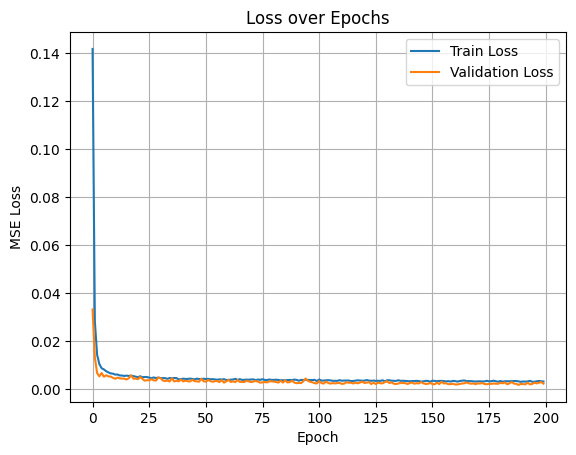

In [143]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


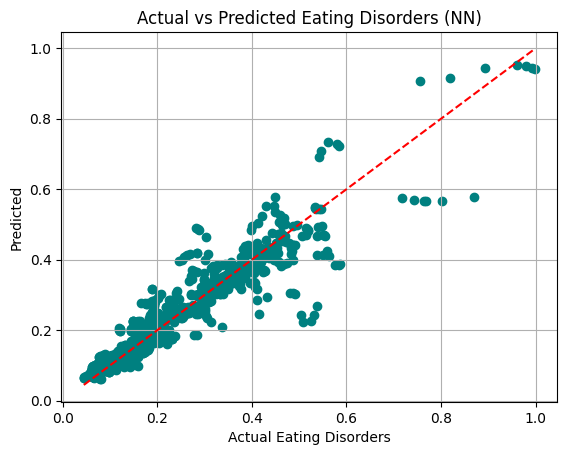

In [144]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_nn, color='teal')
plt.xlabel("Actual Eating Disorders")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Eating Disorders (NN)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()


41/41 [==============================] - 0s 412us/step

📊 Ensemble Model Performance:
MAE: 0.011928263894873675
RMSE: 0.020664989385939796
R²: 0.9786253803528782


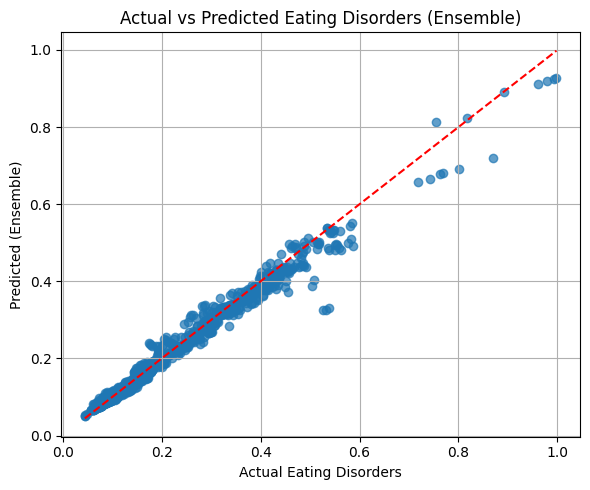

In [145]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Transform target if skewed
transformer = FunctionTransformer(np.log1p, inverse_func=np.expm1)
y_trans = transformer.fit_transform(y_model.values.reshape(-1, 1)).ravel()

# 2. Train-Test split
X_train, X_test, y_train_trans, y_test_trans = train_test_split(X_model_norm, y_trans, test_size=0.2, random_state=42)

# 3. Build deeper NN
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

# 4. Train NN
model.fit(X_train, y_train_trans, epochs=200, batch_size=32, validation_split=0.1, verbose=0)

# 5. Predict from NN and inverse-transform
y_pred_nn_trans = model.predict(X_test).flatten()
y_pred_nn = transformer.inverse_transform(y_pred_nn_trans.reshape(-1, 1)).ravel()
y_test = transformer.inverse_transform(y_test_trans.reshape(-1, 1)).ravel()

# 6. Random Forest model on same transformed y
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train_trans)
y_pred_rf_trans = rf.predict(X_test)
y_pred_rf = transformer.inverse_transform(y_pred_rf_trans.reshape(-1, 1)).ravel()

# 7. Ensemble prediction (average)
y_pred_ensemble = (y_pred_nn + y_pred_rf) / 2

# 8. Evaluation
print("\n📊 Ensemble Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_ensemble))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ensemble)))
print("R²:", r2_score(y_test, y_pred_ensemble))

# 9. Plot
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_ensemble, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Eating Disorders")
plt.ylabel("Predicted (Ensemble)")
plt.title("Actual vs Predicted Eating Disorders (Ensemble)")
plt.grid(True)
plt.tight_layout()
plt.show()


The dataset used may have inherent bias due to underreporting, regional disparities in mental health diagnosis, and class imbalance—particularly fewer high-prevalence eating disorder cases. To reduce this:

Applied log transformation to address skewness in the target variable.
Used an ensemble model (Neural Network + Random Forest) to improve generalization and reduce overfitting.
Ensured feature normalization to prevent dominant influence from common disorders.
Evaluated results visually to identify and correct underprediction trends.
Remaining limitations include lack of demographic data and potential cultural/reporting bias. Future improvements should incorporate subgroup features and region-aware corrections for fairer predictions.
